In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv("train_data.csv")
train_data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [3]:
s_sol = pd.read_csv("sample_solution.csv")
s_sol.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [5]:
test_data = pd.read_csv("test_data.csv")
test_data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [6]:
test_data.shape

(5000, 11)

In [7]:
train_data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [9]:
# train_data["stops"] = train_data["stops"].map({"one":1, "zero":0 ,"two_or_more": 2})
# train_data.head()

Distribution of duration and hue is source_city


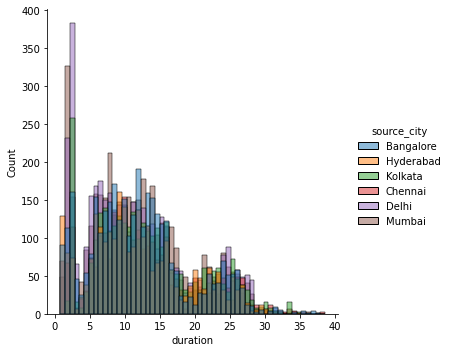

Distribution of duration and hue is departure_time


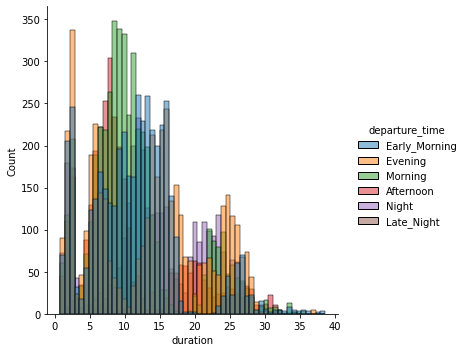

Distribution of duration and hue is arrival_time


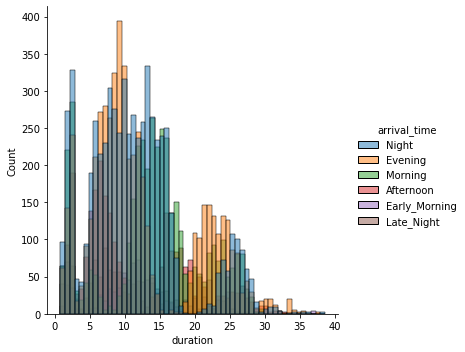

Distribution of duration and hue is destination_city


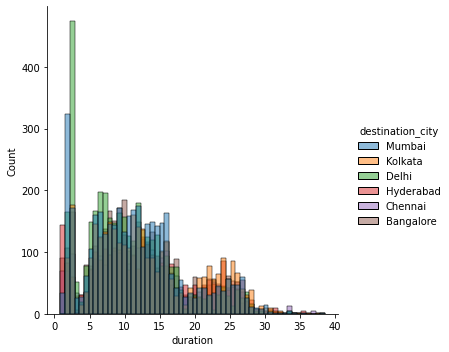

Distribution of duration and hue is class


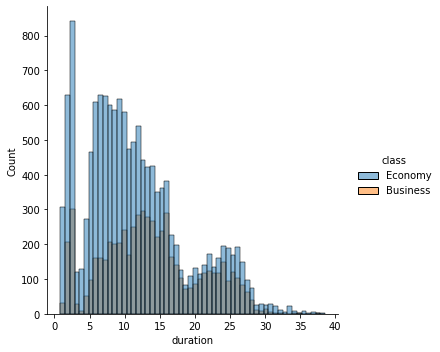

In [8]:
for col in ["source_city","departure_time","arrival_time","destination_city","class"]:
  sns.displot(data=train_data, x="duration", hue=col)
  print("Distribution of duration and hue is", col)
  plt.show() 

	 Distribution of price and hue is  source_city


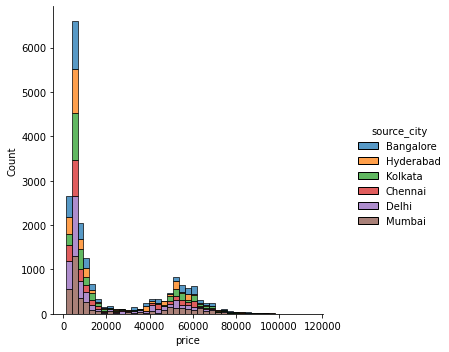

	 Distribution of price and hue is  departure_time


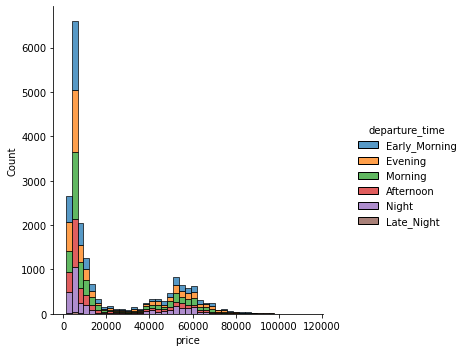

	 Distribution of price and hue is  arrival_time


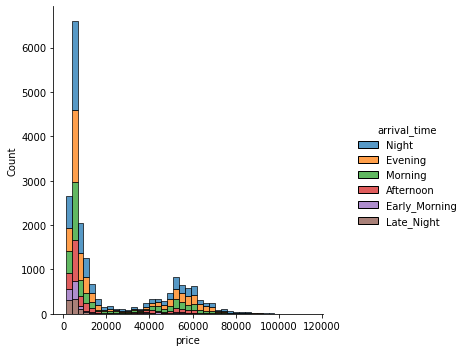

	 Distribution of price and hue is  destination_city


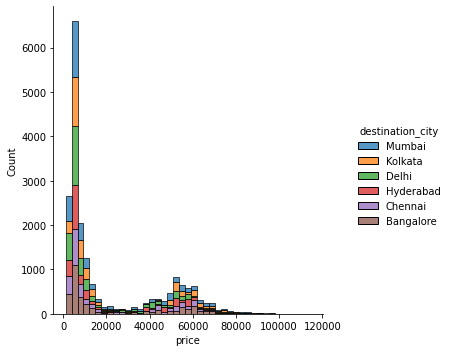

	 Distribution of price and hue is  class


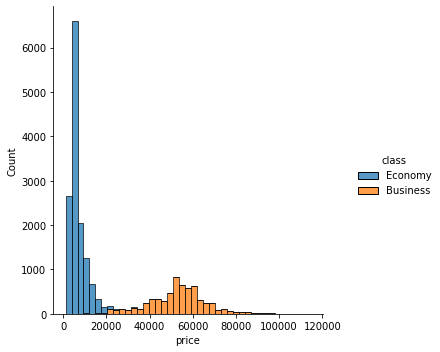

In [9]:
for col in ["source_city","departure_time","arrival_time","destination_city","class"]:
  sns.displot(data=train_data, x="price", hue=col, multiple="stack")
  print("\t Distribution of price and hue is ", col) 
  plt.show()

In [10]:
train_data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


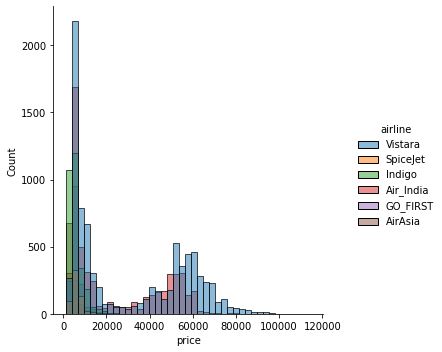

In [11]:
sns.displot(data=train_data, x="price", hue="airline")
plt.show()

In [12]:
df = train_data.drop(["flight", "id"], axis=1)
df.head() 

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [13]:
train_data["class"].value_counts()

Economy     13753
Business     6247
Name: class, dtype: int64

In [14]:
df["class"] = df['class'].map({"Business": 1, "Economy": 0})
df.head()    

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,0,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,0,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,1,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,0,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,0,2.00,4,10712


In [15]:
train_data.destination_city.value_counts() 

Mumbai       3918
Delhi        3825
Bangalore    3425
Kolkata      3323
Hyderabad    2814
Chennai      2695
Name: destination_city, dtype: int64

In [16]:
airline_data = pd.get_dummies(df.airline)
source_city_data = pd.get_dummies(df.source_city) 
departure_time_data = pd.get_dummies(df.departure_time)
arival_time_data = pd.get_dummies(df.arrival_time)
destination_city_data = pd.get_dummies(df.destination_city)


In [17]:
df2 = df.drop(["airline","source_city","departure_time","arrival_time","destination_city"], axis=1)
df2.head()

,stops,class,duration,days_left,price
0,one,0,14.25,21,7212
1,zero,0,1.75,7,5292
2,one,1,9.58,5,60553
3,one,0,6.75,28,5760
4,zero,0,2.00,4,10712


In [18]:
df3 = pd.concat([airline_data,source_city_data,departure_time_data,arival_time_data,destination_city_data,df2], axis=1)
df3.head()
# df3.columns = ["stops","class","duration","days_left","price","Airline","Source_city","Departure_time","Arrival_time","Destination_city"]

,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Bangalore,Chennai,Delhi,Hyderabad,...,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,stops,class,duration,days_left,price
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,one,0,14.25,21,7212
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,zero,0,1.75,7,5292
2,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,one,1,9.58,5,60553
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,one,0,6.75,28,5760
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,zero,0,2.00,4,10712


In [19]:
df3.corrwith(df3["price"])

AirAsia         -0.174272
Air_India        0.070827
GO_FIRST        -0.191557
Indigo          -0.283825
SpiceJet        -0.115649
Vistara          0.360410
Bangalore        0.016966
Chennai          0.008925
Delhi           -0.041629
Hyderabad       -0.030848
Kolkata          0.009223
Mumbai           0.036125
Afternoon       -0.045462
Early_Morning   -0.020004
Evening          0.009324
Late_Night      -0.037237
Morning          0.016467
Night            0.045041
Afternoon       -0.048976
Early_Morning   -0.070650
Evening          0.063804
Late_Night      -0.097337
Morning          0.044133
Night            0.013207
Bangalore        0.015385
Chennai          0.020512
Delhi           -0.064619
Hyderabad       -0.016315
Kolkata          0.041162
Mumbai           0.007472
class            0.937868
duration         0.213158
days_left       -0.102545
price            1.000000
dtype: float64

In [32]:
# train_data.head() 

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [33]:
# X, y = df3.drop("price", axis=1), df3["price"]
# X.head()

In [20]:
train_data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [21]:

cat_list = ["airline","source_city","departure_time","arrival_time","destination_city","stops","class"]
num_list = ["duration","days_left"]

full_pipeline = ColumnTransformer([
    ("std_scaler", StandardScaler(), num_list),
    ("cat_encode", OneHotEncoder(), cat_list),
  ]
) 

y = train_data["price"]
X = full_pipeline.fit_transform(train_data).toarray()
X

array([[ 0.28952803, -0.36141789,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.45682723, -1.38897606,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.36291029, -1.53577008,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 3.23458153, -0.65500594,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58012154, -0.36141789,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.84836171,  0.00556716,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
# X_train

In [23]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X, y)

DecisionTreeRegressor()

In [24]:
y_predict = DT_model.predict(X)
y_predict

array([ 7212.,  5292., 60553., ..., 14822.,  6450.,  7141.])

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(y_predict, y))

252.5643964912711

In [26]:
DT_model.score(X, y) 

0.9998770207964058

In [95]:
actual_test_data = full_pipeline.fit_transform(test_data).toarray()
actual_test_data

array([[ 2.17930407, -1.75411081,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.20548051,  0.58318436,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.41382134,  0.29102246,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.15862287,  0.80230578,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.13704002,  0.87534626,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.51346269,  1.67879147,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [100]:
actual_predict = DT_model.predict(actual_test_data)
actual_predict

array([43910., 51384., 22152., ..., 50271., 50868., 74015.])

In [ ]:
DT_model.score()

In [27]:
RF_model = RandomForestRegressor(random_state=0)
RF_model.fit(X, y)

RandomForestRegressor(random_state=0)

In [28]:
rf_predict = RF_model.predict(X)
rf_predict

array([ 6837.39      ,  5776.19      , 60100.97      , ...,
       14721.84166667,  6440.82      ,  7031.66      ])

In [59]:
np.sqrt(mean_squared_error(rf_predict, y))

1404.5447643450584

In [60]:
RF_model.score(X, y)

0.9961967174672709

In [68]:
test_data_predict = full_pipeline.fit_transform(test_data)
predicted_data = RF_model.predict(test_data_predict)
s_sol["price"] = predicted_data
s_sol.to_csv("flight_price_predictor.csv", index=0)

In [66]:
s_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5000 non-null   int64  
 1   price   5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.2 KB


In [69]:
pd.DataFrame({"RF predict":rf_predict, "data": y})

,RF predict,data
0,6837.390000,7212
1,5776.190000,5292
2,60100.970000,60553
3,5877.100000,5760
4,9226.630000,10712
...,...,...
19995,3139.240000,3153
19996,3704.690000,3911
19997,14721.841667,14822
19998,6440.820000,6450


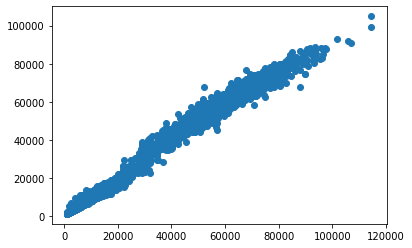

In [70]:
plt.scatter(x=y, y=rf_predict)

In [71]:

pd.DataFrame({"predict":y_predict, "data": y})

,predict,data
0,7212.0,7212
1,5292.0,5292
2,60553.0,60553
3,5760.0,5760
4,10712.0,10712
...,...,...
19995,3153.0,3153
19996,3911.0,3911
19997,14822.0,14822
19998,6450.0,6450


In [72]:
train_data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

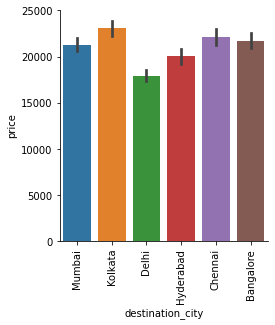

In [58]:
# plt.bar(x=train_data.groupby("departure_time").price.mean())
sns.catplot(
    data=train_data, x="destination_city", y="price",
    kind="bar", height=4, aspect=1,
)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

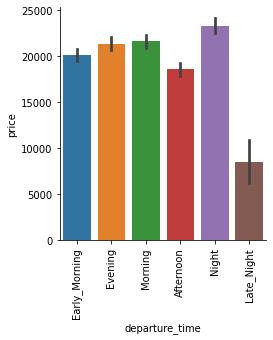

In [73]:
sns.catplot(
    data=train_data, x="departure_time", y="price",
    kind="bar", height=4, aspect=1,
)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

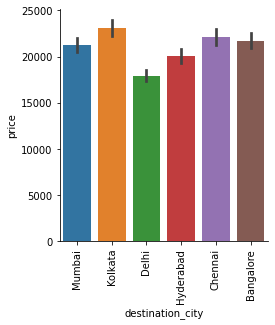

In [74]:
sns.catplot(
    data=train_data, x="destination_city", y="price",
    kind="bar", height=4, aspect=1,
)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

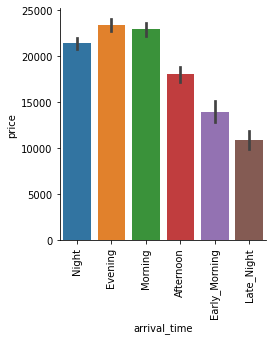

In [75]:
sns.catplot(
    data=train_data, x="arrival_time", y="price",
    kind="bar", height=4, aspect=1,
)
plt.xticks(rotation=90)

In [ ]:
# as a conclusion i can say that random forest and decision tree have showed high accuracy so i chose random forest  
# as my main model. I was planning to drop some unnecessory columns too. It seemed like departure_time and arrival_time
# are not that necessoty. However after encoding these two columns i got normal accuracy. Here flight price depends on class 
# with high correlation
